In [23]:
#libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math 
from tabulate import tabulate

In [24]:
#input variables
N = int(input("Numero de usuarios: "))
proConnect =  float(input("Probabilidad que se conecte un usuario: "))
proDisconnect =  float(input("Probabilidad que se desconecte un usuario: "))

In [25]:
#variables
P = np.zeros((N+1,N+1)) #matriz de probabilidad
expor_matriz = 'matriz_probabilidad.txt'

In [26]:
#functions
def combinatoria(n,x):
    if x > n or x < 0:
        return 0
    else:
        return  math.comb(n, x)
        
def binomial(n,x,p):
    return combinatoria(n,x) *  (p ** x) * ((1 - p)**(n - x))

# DATOS
- i= hace referencia a la cantidad de usuarios conectados en ese momento
- conn = hace referencia al numero de usuarios que se pueden conectar
- nconn = numero de usuarios disponibles para conectar
- xconn = usuarios a conectar
- disc = hace referencia al numero de usuarios que se pueden desconectar
- ndisc = numero de usuarios disponibles para desconectar
- xdisc = usuarios a desconectar
- n = numero de usuarios que usan el ordenador

In [27]:
#code
for i in range(N+1):
    for j in range(N+1):
        #si no hay ningun usuario conectado, probabilidad que se conecten usuarios
        nconn = N - i
        ndisc = i
        sumProba = 0

        if i == 0:
            conn = j
            P[i][j] = binomial(N, conn, proConnect)

        #si todos los usuarios estan conectados probabilidad de desconectar usuarios
        elif i == N: 
            disc = i - j 
            P[i][j] = binomial(N, disc, proDisconnect)
        
        #Desconectar usuarios, sin embargo considerar si se puede conectar de los disponibles de la banca
        elif i > j:
            xdisc = i - j
            xconn = 0

            while xconn <= nconn and xdisc <= ndisc:
                sumProba += (binomial(nconn, xconn, proConnect)) * (binomial(ndisc, xdisc, proDisconnect))
                xconn += 1
                xdisc += 1
            
            P[i][j] = sumProba
        
        #si el usuario actual se desconecta entra Y uno nuevo o no hay ningun cambio, se calcula la diagonal
        elif i <= j:  
            xconn = j - i
            xdisc = 0
            
            while xconn <= nconn and xdisc <= ndisc:
                sumProba += (binomial(nconn, xconn, proConnect)) * (binomial(ndisc, xdisc, proDisconnect))
                xconn += 1
                xdisc += 1
            
            P[i][j] = sumProba

 Numero Usuarios: 5
 Probabilidad de conexion: 0.4
 Probabilidad de desconexion: 0.3


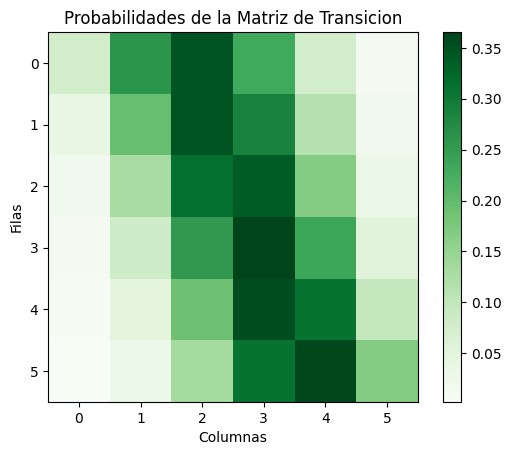

Matriz de Trancicion 
--------------------- 
 
╒════════╤════════╤════════╤════════╤════════╤════════╕
│ 0.0778 │ 0.2592 │ 0.3456 │ 0.2304 │ 0.0768 │ 0.0102 │
├────────┼────────┼────────┼────────┼────────┼────────┤
│ 0.0389 │ 0.1944 │ 0.3456 │ 0.288  │ 0.1152 │ 0.0179 │
├────────┼────────┼────────┼────────┼────────┼────────┤
│ 0.0194 │ 0.1296 │ 0.3132 │ 0.3384 │ 0.168  │ 0.0314 │
├────────┼────────┼────────┼────────┼────────┼────────┤
│ 0.0097 │ 0.081  │ 0.2538 │ 0.3654 │ 0.2352 │ 0.0549 │
├────────┼────────┼────────┼────────┼────────┼────────┤
│ 0.0049 │ 0.0486 │ 0.189  │ 0.3528 │ 0.3087 │ 0.096  │
├────────┼────────┼────────┼────────┼────────┼────────┤
│ 0.0024 │ 0.0283 │ 0.1323 │ 0.3087 │ 0.3601 │ 0.1681 │
╘════════╧════════╧════════╧════════╧════════╧════════╛

Verificacion Sumatoria Filas

fila 0:  1.0
fila 1:  1.0
fila 2:  1.0
fila 3:  0.9999999999999999
fila 4:  0.9999999999999999
fila 5:  0.9999999999999998
Matriz guardada en matriz_probabilidad.txt


In [28]:
#info
print(f" Numero Usuarios: {N}\n",
    f"Probabilidad de conexion: {proConnect}\n",  
    f"Probabilidad de desconexion: {proDisconnect}")

#graphics
x , y = P.shape

plt.imshow(P, cmap='Greens')    
plt.colorbar()
plt.xlabel('Columnas')
plt.xticks(range(x))
plt.ylabel('Filas')
plt.yticks(range(y))
plt.title("Probabilidades de la Matriz de Transicion")
plt.show()

#show matrix
roundM =  np.round(P, decimals=4)
table = tabulate(roundM, tablefmt="fancy_grid", numalign="center", stralign="center")
print("Matriz de Trancicion \n--------------------- \n ")
print(table)

#show sum in row
print("\nVerificacion Sumatoria Filas\n")
for i in range(N+1):
    suma = np.sum(P[i])
    print(f'fila {i}: ', suma)
    i += 1

#save matrix in txt
with open(expor_matriz, 'w') as file:
    # Agregar el título
    file.write(f'Matriz de Transicion para {N} usuarios \n-------------------------------------------------- \n')
    
    for i, row in enumerate(P):
        # Formatea cada fila como una cadena de números separados por tabulaciones
        row_str = '\t'.join([f'{value:.6f}' for value in row])
        
        # Agregar el número de fila antes de la fila formateada
        file.write(f'{i}\t{row_str}\n')

print(f"Matriz guardada en {expor_matriz}")

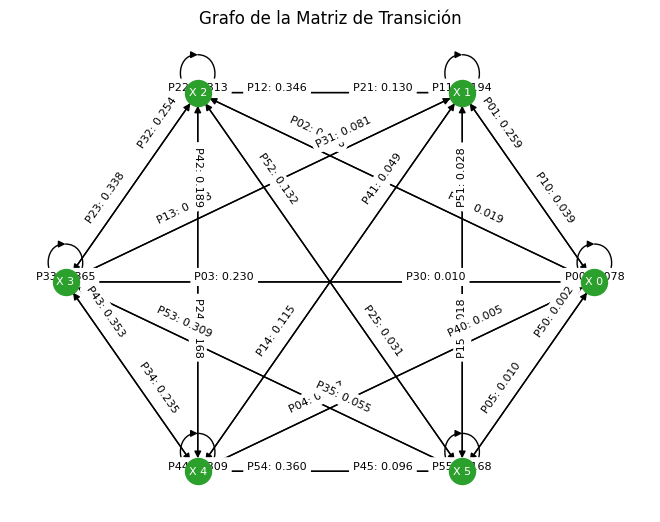

In [29]:
#Graph
Graph = nx.DiGraph()

identifiers = ['X {}'.format(i) for i in range(N + 1)]
edge_labels = {}

for i in range(N+1):
    for j in range(N+1):
        MP = P[i][j]
        if MP > 0:
            origin = identifiers[i]
            destiny = identifiers[j]
            Graph.add_edge(origin, destiny, weight = MP)
            Graph.add_edge(destiny, origin, weight = MP)
            pro = '{:.3f}'.format(P[i][j])
            edge_labels[(origin, destiny)] = f'P{origin.split()[1]}{destiny.split()[1]}: {pro}'

pos = nx.circular_layout(Graph)

nx.draw(Graph, pos, with_labels=True, node_size=350, node_color="tab:green", font_size=8, font_color="white")
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_labels, label_pos= 0.3, font_size=8, verticalalignment='bottom')


plt.title("Grafo de la Matriz de Transición")
plt.axis("off")  # Oculta los ejes
plt.show()

